In [6]:
import numpy as np
import matplotlib.pyplot as plt
import getdist
import camb
import utils

In [28]:
def solve_alpha_B_ft(aktype, alpha_K_0, cs2, ombh2, omch2, w0, wa, H0):
    ombh2 = 0.0122
    h = 0.7
    cosmo = camb.set_params(
        H0=H0, ombh2=ombh2, omch2=omch2, num_nu_massless=3.044, omnuh2=0,
        As=2.1e-9, ns=0.96, tau=0.06, WantTransfer=True, w=w0, wa=wa,
        dark_energy_model="fluid" if (1+w0)*(1+w0+wa) > 0 else "ppf",
        alpha_K_parametrization=aktype-1, cs2_0=cs2, use_cs2=True, alpha_K_0=alpha_K_0
    )
    results = camb.get_background(cosmo)
    log_a = results.Params.log_a
    alpha_B = results.Params.alpha_B
    alpha_K = results.Params.alpha_K
    mu = results.Params.mu
    return log_a*np.log10(np.e), alpha_B, alpha_K, mu

In [25]:
chain = utils.load_chain(46, settings={"ignore_rows": 0.3})
print(f"Number of samples = {len(chain.samples)}")
np.random.shuffle(chain.samples)
thin_factor = 100
thin_samples = chain.samples[::thin_factor]
len(thin_samples)
print(f"Number of samples after thinning = {len(thin_samples)}")

Number of samples = 58179
Number of samples after thinning = 582


In [34]:
print(f"Parameters: {chain.getParamNames()}")
thin_samples[1]

Parameters: alpha_K_0	\alpha_{K,0}
cs2_0	c_s^2
w0pwa	w0pwa
w	w_0
logA	\log(10^{10} A_\mathrm{s})
ns	n_\mathrm{s}
H0	H_0
omegabh2	\Omega_\mathrm{b} h^2
omegach2	\Omega_\mathrm{c} h^2
tau	\tau_\mathrm{reio}
A_planck	y_\mathrm{cal}
cal100A	c_\mathrm{100A}
cal100B	c_\mathrm{100B}
cal143B	c_\mathrm{143B}
cal217A	c_\mathrm{217A}
cal217B	c_\mathrm{217B}
Aradio	A_\mathrm{radio}^\mathrm{PS}
Adusty	A_\mathrm{IR}^\mathrm{PS}
AdustT	A_\mathrm{dustT}
beta_dustT	\beta_\mathrm{dustT}
Acib	A_\mathrm{CIB}
beta_cib	\beta_\mathrm{CIB}
Atsz	A_\mathrm{tSZ}
Aksz	A_\mathrm{kSZ}
xi	\xi_\mathrm{SZxCIB}
AdustP	A_\mathrm{dustP}
beta_dustP	\beta_\mathrm{dustP}
wa*	w_a
As*	A_\mathrm{s}
omegal*	\Omega_\Lambda
omegam*	\Omega_\mathrm{m}
omegamh2*	\Omega_\mathrm{m} h^2
omegab*	\Omega_\mathrm{b}
omegac*	\Omega_\mathrm{c}
sigma8*	\sigma_8
s8h5*	\sigma_8/h^{0.5}
s8omegamp5*	\sigma_8 \Omega_\mathrm{m}^{0.5}
s8omegamp25*	\sigma_8 \Omega_\mathrm{m}^{0.25}
A*	10^9 A_\mathrm{s}
clamp*	10^9 A_\mathrm{s} e^{-2\tau}
age*	{\rm{Ag

array([ 3.62761610e+01,  4.19806300e+01, -1.15199520e+00, -8.54729460e-01,
        3.04584140e+00,  9.71127230e-01,  6.66617910e+01,  2.24133150e-02,
        1.17240070e-01,  6.27668710e-02,  9.96798330e-01,  1.00981530e+00,
        9.93647820e-01,  9.99187720e-01,  9.88678650e-01,  1.00937760e+00,
        5.36731680e+01,  5.55181770e+00,  1.07992530e+00,  1.52459850e+00,
        8.79684170e-01,  1.91426410e+00,  7.59598820e+00,  8.39527620e+00,
        4.13473410e-01,  1.20167610e+00,  1.57433030e+00, -2.97265720e-01,
        2.10277170e-09,  6.84201430e-01,  3.15717240e-01,  1.40298250e-01,
        5.04373350e-02,  2.63828750e-01,  8.19043050e-01,  1.00315550e+00,
        4.60209820e-01,  6.13947600e-01,  2.10277170e+00,  1.85469930e+00,
        1.37713640e+01,  1.47777180e+02,  2.45900950e-01,  1.45116200e-03,
        1.91426410e+00,  9.08954980e+00,  2.27447580e+01,  1.63805220e+03,
        1.68504290e+01,  1.68504290e+01,  3.22917990e+04,  3.05208440e+04,
        2.27447580e+01,  

In [37]:
# Post-processing to get the functions
alpha_Bs = []
alpha_Ks = []
mus      = []
for sample in thin_samples:
    alpha_K_0 = sample[0]
    cs2 = sample[1]
    w0 = sample[3]
    wa = sample[2] - w0
    H0 = sample[6]
    ombh2 = sample[7]
    omch2 = sample[8]
    log_a, alpha_B, alpha_K, mu = solve_alpha_B_ft(aktype=1, alpha_K_0=alpha_K_0, cs2=cs2, ombh2=ombh2, omch2=omch2, w0=w0, wa=wa, H0=H0)
    alpha_Bs.append(alpha_B)
    alpha_Ks.append(alpha_K)
    mus.append(mu)
alpha_Bs = np.array(alpha_Bs)
alpha_Ks = np.array(alpha_Ks)
mus = np.array(mus)

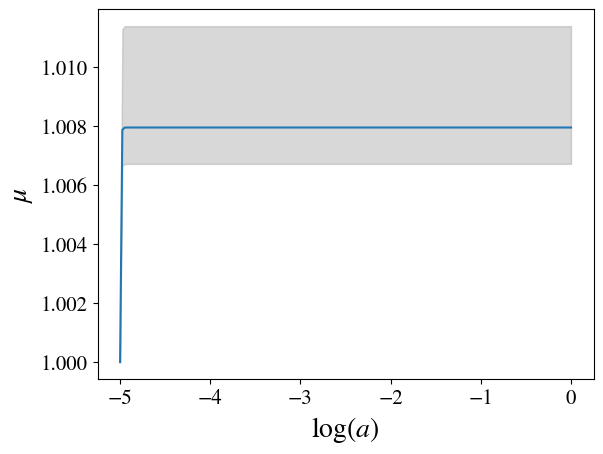

In [47]:
plt.plot(log_a, np.mean(mus, axis=0))
plt.fill_between(log_a, np.percentile(mus, 2.5, axis=0), np.percentile(mus, 97.5, axis=0), color="gray", alpha=0.3)
plt.xlabel("$\\log(a)$", fontsize=20)
plt.ylabel("$\\mu$", fontsize=20)
plt.tick_params(axis="both", labelsize=15)